# Introduction

The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail" found at this link: https://archive.ics.uci.edu/ml/datasets/online+retail

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 (dd/mm/yyyy) for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The dataset contains the following information:
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides. 

### Imports


In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

# Exploratory Data Analysis
## Data Cleaning and Feature Engineering
Let's start by reading our dataset.

In [2]:
df = pd.read_csv("./Dataset/ecommerce_data.csv", encoding = 'ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [26]:
df.shape

(541909, 8)

Our dataset has 8 columns and 541 909 sales records. Let's see if we have any null values!

In [27]:
df.isnull().sum()/len(df)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

0.2% of 'Description' data is missing, while a whopping 25% of CustomerID are missing. Let's analyze this further by taking a look at these particular records and see if there are any paterns.

In [28]:
df[df.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


Since we cannot really impute a customerID, we will just drop the missing values.

In [3]:
df_no_missing = df.dropna()
df_no_missing.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Now that we have no missing values, let's look at our data types and see if any conversions are needed.

In [30]:
df_no_missing.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

We will do the following converstions:
- InvoiceDate to datetime object
- CustomerID to int64

In [4]:
df_no_missing['InvoiceDate'] = pd.to_datetime(df_no_missing.InvoiceDate, format='%m/%d/%Y %H:%M')
df_no_missing['CustomerID'] = df_no_missing['CustomerID'].astype('int64')

df_no_missing.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

We can break down the InvoiceDate column into hour ,day, month, year, day of week, week of year and quarter columns.

In [5]:
cols = ['hour','year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
i=0
for col in cols:
    names = ['Hour','Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear', 'WeekOfYear', 'Quarter']
    df_no_missing[names[i]] = getattr(df_no_missing['InvoiceDate'].dt,col)
    i+=1

C:\Users\Abderraouf\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [33]:
df_no_missing['DayOfWeek'].unique()

array([2, 3, 4, 6, 0, 1], dtype=int64)

We notice that Monday is represented as 0 in our dataset. Let's increase all these numbers by 1 so that Monday is represented as 1 and Sunday as 7.

In [34]:
df_no_missing['DayOfWeek'] = df_no_missing['DayOfWeek'] + 1

Before we proceed any further into our analysis, let's take a look at the overall statistical data for our numerical features.

In [35]:
df_no_missing.describe()

,Quantity,UnitPrice,CustomerID,Hour,Year,Month,Day,DayOfWeek,DayOfYear,WeekOfYear,Quarter
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,12.737472,2010.934002,7.605947,15.036128,3.606402,215.225692,30.936184,2.854160
std,248.693370,69.315162,1713.600303,2.284952,0.248279,3.418942,8.653730,1.921907,103.470584,14.765548,1.122363
min,-80995.000000,0.000000,12346.000000,6.000000,2010.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000
25%,2.000000,1.250000,13953.000000,11.000000,2011.000000,5.000000,7.000000,2.000000,130.000000,19.000000,2.000000
50%,5.000000,1.950000,15152.000000,13.000000,2011.000000,8.000000,15.000000,3.000000,240.000000,34.000000,3.000000
75%,12.000000,3.750000,16791.000000,14.000000,2011.000000,11.000000,22.000000,5.000000,310.000000,44.000000,4.000000
max,80995.000000,38970.000000,18287.000000,20.000000,2011.000000,12.000000,31.000000,7.000000,357.000000,51.000000,4.000000


The most peculiar observation that can be made from the table above is that the Quantity column has a minimum of -80995 units. This simply does not make any sense as a shop cannot sell negative units. Let's look at a violin plot to look at the distribution.

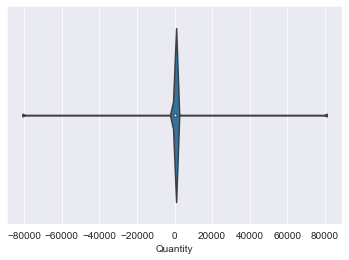

In [36]:
sns.violinplot(x='Quantity',data=df_no_missing)

In [ ]:
plotsave = sns.violinplot(x='Quantity',data=df_no_missing)

We will remove the negative quantities from our dataset

,Quantity,UnitPrice,CustomerID,Hour,Year,Month,Day,DayOfWeek,DayOfYear,WeekOfYear,Quarter
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,12.728247,2010.934259,7.612537,15.042181,2.614555,215.432698,30.964629,2.856106
std,180.420210,22.096788,1713.169877,2.273535,0.247829,3.416527,8.653771,1.928274,103.403711,14.755880,1.121873
min,1.000000,0.000000,12346.000000,6.000000,2010.000000,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000
25%,2.000000,1.250000,13969.000000,11.000000,2011.000000,5.000000,7.000000,1.000000,130.000000,19.000000,2.000000
50%,6.000000,1.950000,15159.000000,13.000000,2011.000000,8.000000,15.000000,2.000000,240.000000,34.000000,3.000000
75%,12.000000,3.750000,16795.000000,14.000000,2011.000000,11.000000,22.000000,4.000000,310.000000,44.000000,4.000000
max,80995.000000,8142.750000,18287.000000,20.000000,2011.000000,12.000000,31.000000,6.000000,357.000000,51.000000,4.000000


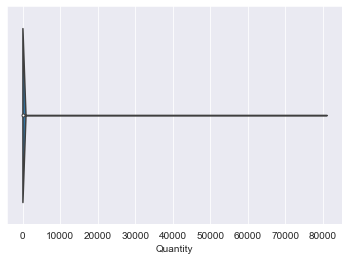

In [6]:
df_no_missing = df_no_missing[df_no_missing['Quantity'] > 0 ]
sns.violinplot(x='Quantity',data=df_no_missing)
df_no_missing.describe()

The statistical data for Quantity now makes sense, with a minimum of 1. We can also add an amount spent column to capture amount of money spent on a product and its quantity.

In [7]:
df_no_missing['AmountSpent'] = df_no_missing['Quantity'] * df_no_missing['UnitPrice']
df_no_missing.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Year,Month,Day,DayOfWeek,DayOfYear,WeekOfYear,Quarter,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,8,2010,12,1,2,335,48,4,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,2010,12,1,2,335,48,4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,8,2010,12,1,2,335,48,4,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,2010,12,1,2,335,48,4,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,2010,12,1,2,335,48,4,20.34


## Purchases by Customer and Country

Let's start by getting the number of sales per customer for each country. We will count the number of invoices made by each customer to find the number of sales.

In [43]:
sales_per_cust = df_no_missing.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
sales_per_cust.columns = ['CustomerID', 'Country', "NumberOfSales"]
sales_per_cust.head(10)

,CustomerID,Country,NumberOfSales
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700
2185,15311,United Kingdom,2379
1698,14646,Netherlands,2080
570,13089,United Kingdom,1818
699,13263,United Kingdom,1677
1443,14298,United Kingdom,1637


We can see, from  high level, that alot of customers with lots of sales are in the UK. Please note that EIRE is the Irish name for Ireland. We cn visualize the number of orders for each customerID.

(<Figure size 1080x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x164d53bed48>)

Text(0.5, 0, 'Customers ID')

Text(0, 0.5, 'Number of Orders')

Text(0.5, 1.0, 'Number of Orders for different Customers')

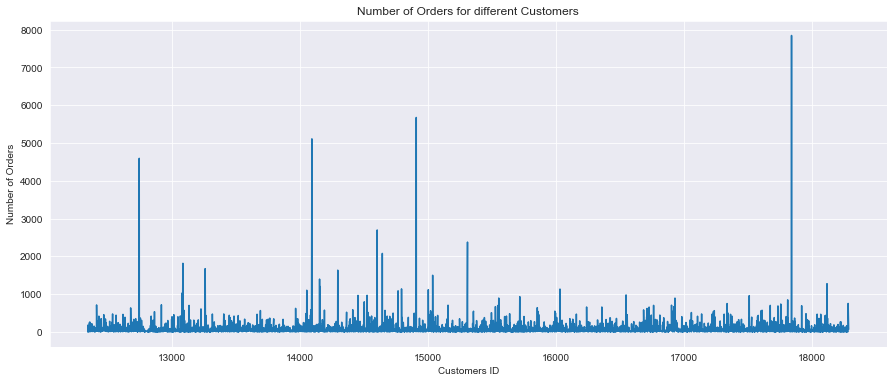

In [44]:
orders = df_no_missing.groupby('CustomerID', as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')

As we can see, threare a handful of customers that above 2000 purchases with the company, the majority being under 1000 purchases during the one year time period. However, making lots of purchases doesn't necessarily equate to spending the most money. The chart below will show the amount spent per customer ID.

(<Figure size 1080x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x164c9873848>)

Text(0.5, 0, 'Customers ID')

Text(0, 0.5, 'Money Spent ($)')

Text(0.5, 1.0, 'Money Spent for different Customers')

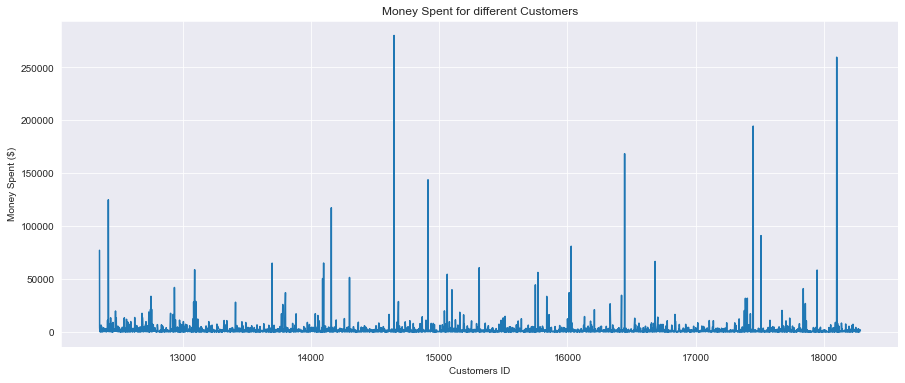

In [45]:
money_spent = df_no_missing.groupby(['CustomerID','Country'], as_index=False)['AmountSpent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.AmountSpent)
plt.xlabel('Customers ID')
plt.ylabel('Money Spent ($)')
plt.title('Money Spent for different Customers')

In [46]:
spent_per_cust = df_no_missing.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum().sort_values(by='AmountSpent', ascending=False)
spent_per_cust.columns = ['CustomerID', 'Country', "TotalSpent"]
spent_per_cust.head(10)

,CustomerID,Country,TotalSpent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
57,12415,Australia,124914.53
1342,14156,EIRE,117379.63
3780,17511,United Kingdom,91062.38
2711,16029,United Kingdom,81024.84
0,12346,United Kingdom,77183.60


As we can see from the table above, CustomerID 14646 spent the most amount of money in our store even though he has less invoices than CustomerID 17481, who has the most invoices but does not appear in top 10 most amount spent.

## Purchasing Patterns

Let's take a look at when purchases are made to figure out when is the best time period to attract more customers (we can cater sales and promotions during this timeframe)! We will extract the best:
- Day of the week
- Time of the day
- Months

Note that the timeline for our dataset is from Dec 2010 to Dec 2011. We need a column that can capture the two different December months. We will create a 'MonthYear' column for this purpose.

In [49]:
df_no_missing['YearMonth'] = df_no_missing['InvoiceDate'].apply(lambda x: str(x.year) + '-' + str(x.month))

Let'look at the sales per month.

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Orders')

Text(0.5, 1.0, 'Number of orders per Month (1st Dec 2010 - 9th Dec 2011)')

[Text(0, 0, 'Dec_10'),
 Text(0, 0, 'Jan_11'),
 Text(0, 0, 'Feb_11'),
 Text(0, 0, 'Mar_11'),
 Text(0, 0, 'Apr_11'),
 Text(0, 0, 'May_11'),
 Text(0, 0, 'Jun_11'),
 Text(0, 0, 'July_11'),
 Text(0, 0, 'Aug_11'),
 Text(0, 0, 'Sep_11'),
 Text(0, 0, 'Oct_11'),
 Text(0, 0, 'Nov_11'),
 Text(0, 0, 'Dec_11')]

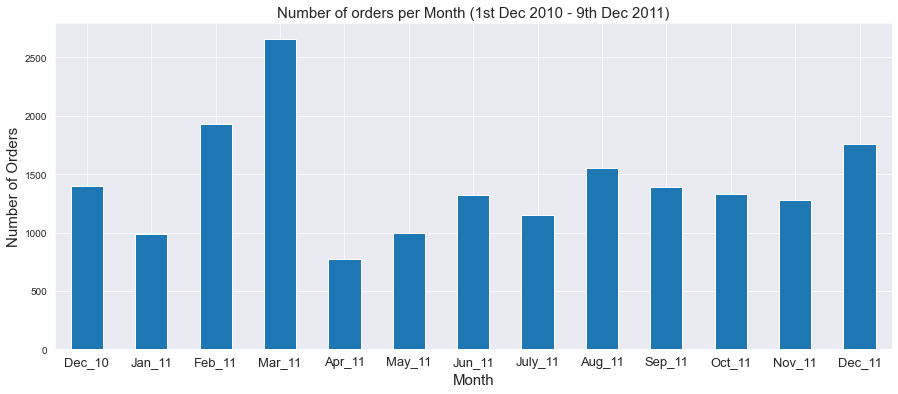

In [54]:
ax = df_no_missing.groupby('InvoiceNo')['YearMonth'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders per Month (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)

Our best selling month is March 2011. December 2010 was not a very successful moth even though it is Christmas period and people usually make lots of purchases during that month as gifts. December 2011 bar only shows the  first 10 days and the sales look very promising to be the most successful month of the dataset time period.

Let's do the same but with the days of the week.

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Number of Orders')

Text(0.5, 1.0, 'Number of orders for different Days')

[Text(0, 0, 'Mon'),
 Text(0, 0, 'Tue'),
 Text(0, 0, 'Wed'),
 Text(0, 0, 'Thur'),
 Text(0, 0, 'Fri'),
 Text(0, 0, 'Sun')]

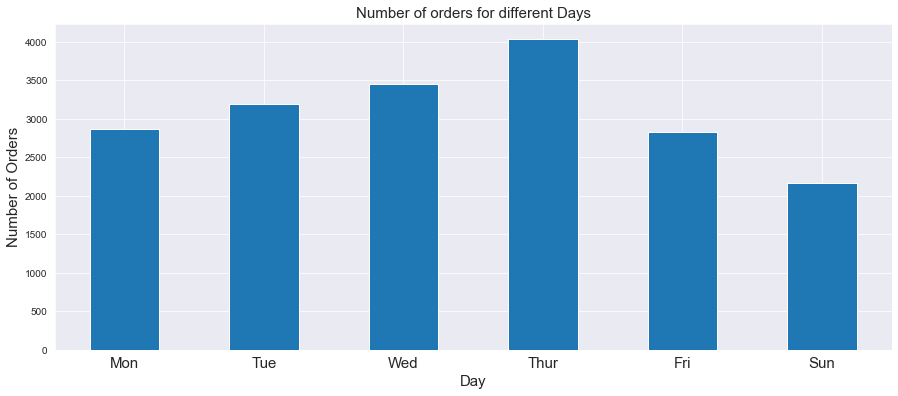

In [51]:
ax = df_no_missing.groupby('InvoiceNo')['DayOfWeek'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)

We can see that the number of sales increase from Monday to Thursday, hits a peak of around 4000 sales on Thursday, then gradually decreases to around 2200 sales on Sunday.

Next, let's plot the number of orders per hour!

In [55]:
ax = df_no_missing.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Text(0.5, 0, 'Week')

Text(0, 0.5, 'Number of Orders')

Text(0.5, 1.0, 'Number of orders per week of the year')

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '27'),
 Text(0, 0, '28'),
 Text(0, 0, '29'),
 Text(0, 0, '30'),
 Text(0, 0, '31'),
 Text(0, 0, '32'),
 Text(0, 0, '33'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '36'),
 Text(0, 0, '37'),
 Text(0, 0, '38'),
 Text(0, 0, '39'),
 Text(0, 0, '40'),
 Text(0, 0, '41'),
 Text(0, 0, '42'),
 Text(0, 0, '43'),
 Text(0, 0, '44'),
 Text(0, 0, '45'),
 Text(0, 0, '46'),
 Text(0, 0, '47'),
 Text(0, 0, '48'),
 Text(0, 0, '49')]

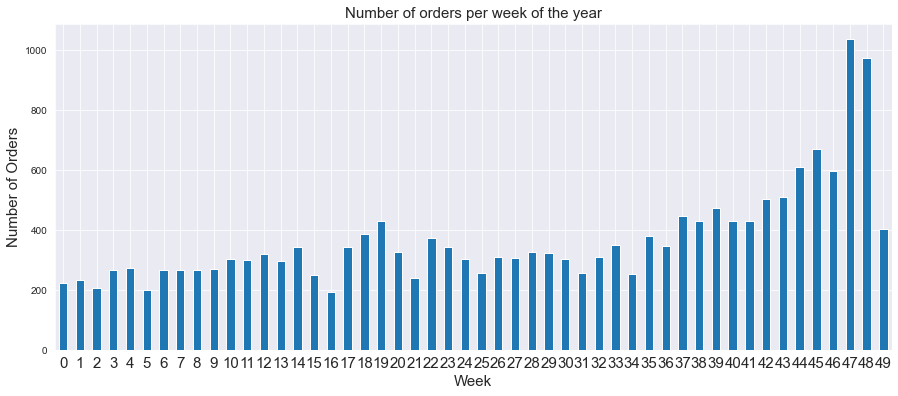

In [53]:
ax = df_no_missing.groupby('InvoiceNo')['WeekOfYear'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Week',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders per week of the year',fontsize=15)
ax.set_xticklabels(range(0,52), rotation='horizontal', fontsize=15)

The number of orders stays constant more or less throughtout the year until it dramatically increases on Week 47 and 48. This coincides with the second half of November, where people starts to buy christmas gifts.

## Unit Price Analysis

It important to look at the average unit price that the consumers are buying.

In [56]:
df_no_missing['UnitPrice'].describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

The average price for an item is \\$3.1, with a standard deviation of \\$22. The cheapest item in the store was \\$0 which means some items were given out for free, while the most expensive item ws a whopping $8142. Let's look at the distribution of unit price.

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x164d50f8b08>)

C:\Users\Abderraouf\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



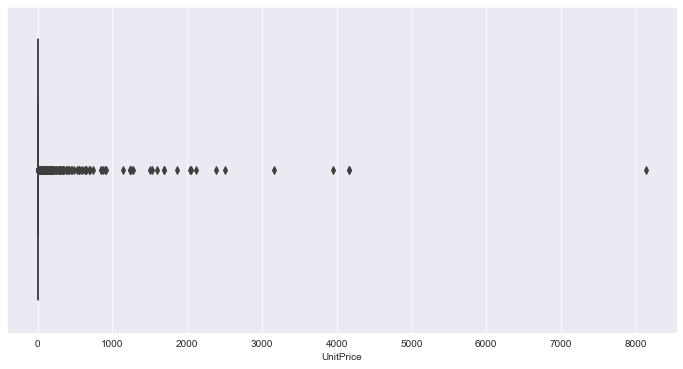

In [57]:
plt.subplots(figsize=(12,6))
sns.boxplot(df_no_missing.UnitPrice)

As we can see, the majority of items are priced between 0 and 700ish dollars. It is interesting to see what and when the store gave away free items.

In [58]:
df_free = df_no_missing[df_no_missing.UnitPrice == 0]
print(len(df_free))
df_free['Description'].unique()

40


array(['ROUND CAKE TIN VINTAGE GREEN', 'ADVENT CALENDAR GINGHAM SACK',
       'REGENCY CAKESTAND 3 TIER', 'PAPER BUNTING RETROSPOT',
       'PLASTERS IN TIN SKULLS', 'ORGANISER WOOD ANTIQUE WHITE ',
       'FAIRY CAKES NOTEBOOK A6 SIZE',
       'CERAMIC BOWL WITH LOVE HEART DESIGN',
       'MINI CAKE STAND  HANGING STRAWBERY',
       'HEART GARLAND RUSTIC PADDED',
       'CHILDS BREAKFAST SET CIRCUS PARADE', 'PARTY BUNTING',
       'SET OF 6 SOLDIER SKITTLES', ' OVAL WALL MIRROR DIAMANTE ',
       'JAM MAKING SET WITH JARS', 'Manual', 'SET OF 6 NATIVITY MAGNETS ',
       'SET OF 2 CERAMIC PAINTED HEARTS ',
       'SET OF 2 CERAMIC CHRISTMAS REINDEER', '36 FOIL STAR CAKE CASES ',
       'POLKADOT RAIN HAT ', 'PADS TO MATCH ALL CUSHIONS',
       'GLASS CLOCHE SMALL', 'PASTEL COLOUR HONEYCOMB FAN',
       'BISCUIT TIN VINTAGE CHRISTMAS', 'CHRISTMAS PUDDING TRINKET POT ',
       'JUMBO BAG SPACEBOY DESIGN', 'RED KITCHEN SCALES',
       "CHILDREN'S APRON DOLLY GIRL ", 'MINI LIGHTS WOODLAND 

35 unique items were given out for free to 40 customers. A list of the items is show above and the theme is warm/colorful home decoration.

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Frequency for different Months (Dec 2010 - Dec 2011)')

[Text(0, 0, 'Dec_10'),
 Text(0, 0, 'Jan_11'),
 Text(0, 0, 'Feb_11'),
 Text(0, 0, 'Mar_11'),
 Text(0, 0, 'Apr_11'),
 Text(0, 0, 'May_11'),
 Text(0, 0, 'July_11'),
 Text(0, 0, 'Aug_11'),
 Text(0, 0, 'Sep_11'),
 Text(0, 0, 'Oct_11'),
 Text(0, 0, 'Nov_11')]

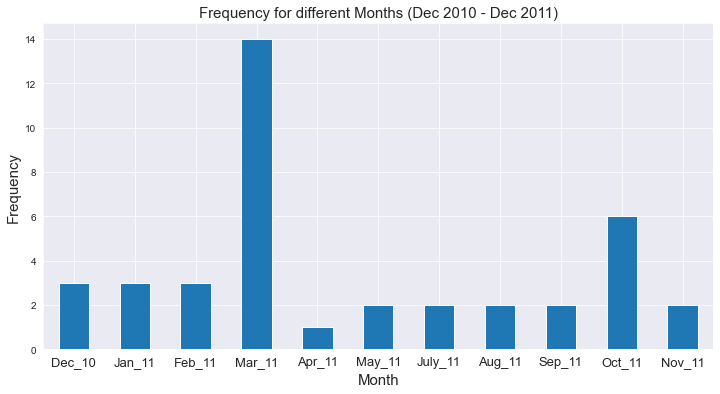

In [59]:
ax = df_free.YearMonth.value_counts().sort_index().plot(kind='bar',figsize=(12,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)

14 of those items were given in March 2011, whith the rest of the month seeing an average of 2-3 free items with the exception of June 2011, where there were no giveaways.

## Analysis per Country

Let's take a look at sales and amount spent per country.

(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x164d1589bc8>)

Text(0.5, 0, 'Number of Orders')

Text(0, 0.5, 'Country')

Text(0.5, 1.0, 'Number of Orders for different Countries')

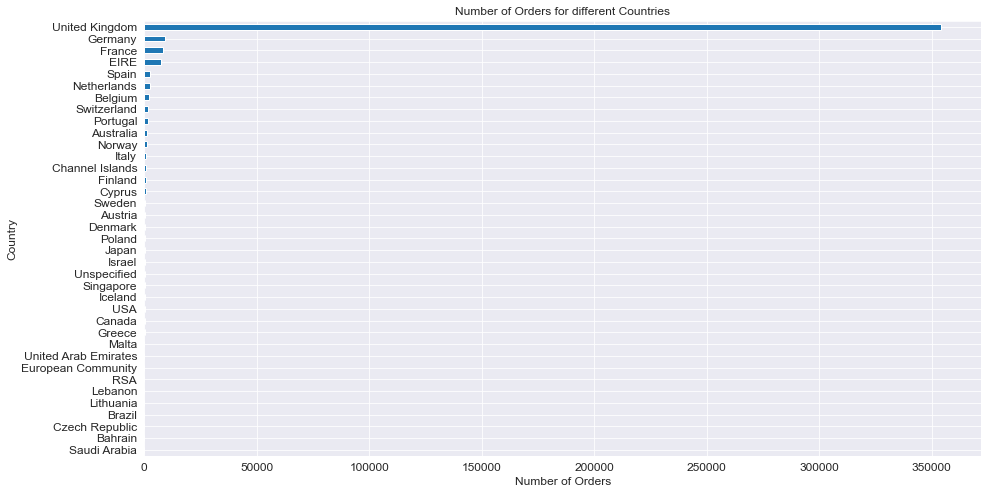

In [60]:
group_country_orders = df_no_missing.groupby('Country')['InvoiceDate'].count().sort_values()

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)

UK makes up the bulk of the orders which just over 350000 in one year. Let's plot another chart excluding the UK to better visualize the other country's sales numbers.

(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x164d1e4fd08>)

Text(0.5, 0, 'Number of Orders')

Text(0, 0.5, 'Country')

Text(0.5, 1.0, 'Number of Orders for different Countries')

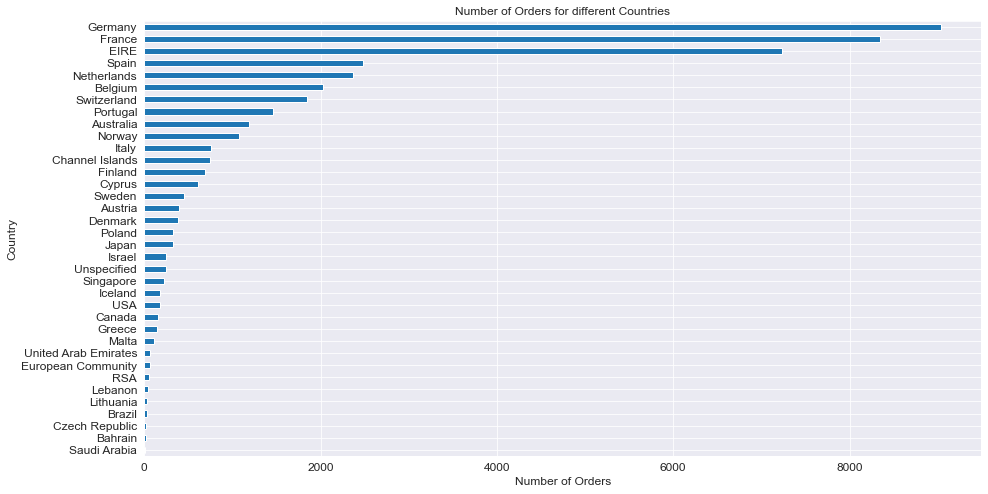

In [61]:
group_country_orders_without_uk = group_country_orders.copy()
del group_country_orders_without_uk['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders_without_uk.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)

After the UK, Germany is the next biggest customer in terms of orders (9042), followed closely by France (8342) and EIRE (7238). The number of orders drop dramatically between these and the next country Spain, to just over 2485 orders. Number of orders are important, but a more important metric is amount spent by customers of a particular country.

(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x164d501dc48>)

Text(0.5, 0, 'Money Spent (Dollar)')

Text(0, 0.5, 'Country')

Text(0.5, 1.0, 'Money Spent by different Countries')

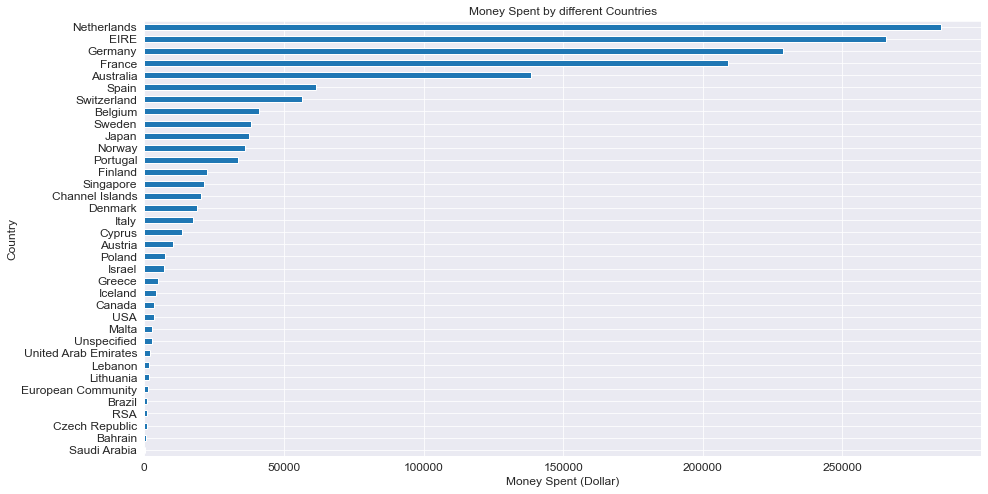

In [62]:
# Amount spent by each country (without UK)
group_country_amount_spent = df_no_missing.groupby('Country')['AmountSpent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)

Excluding the UK, the Netherlands (\\$285 446), EIRE (\\$265 459), Germany (\\$228 867) and France (\\$209 024) are our major spenders. The UK, while not shown on the plot above, contributed to \\$7 308 392 worth of sales.

## Item Trends



Let's count the number of items sold for each product for each period.

In [63]:
date_item_df = df_no_missing.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

# Rank items by the last month's sales
last_month_sorted_df = date_item_df.loc['2011-11-30']
last_month_sorted_df = last_month_sorted_df.reset_index()
last_month_sorted_df.sort_values(by='Quantity', ascending=False).head(10)

,InvoiceDate,StockCode,Quantity
2371,2011-11-30,84826,12551
1567,2011-11-30,23084,12393
827,2011-11-30,22197,8458
738,2011-11-30,22086,5919
2488,2011-11-30,85099B,5678
2385,2011-11-30,84879,5190
1135,2011-11-30,22578,4981
2498,2011-11-30,85123A,4861
1134,2011-11-30,22577,4582
2278,2011-11-30,84077,4500


Let's grab the top 5 items and their corresponding codes.

In [64]:
date_item_df = df_no_missing.loc[df_no_missing['StockCode'].isin(['23084', '84826', '22197', '22086', '85099B'])].set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df

InvoiceDate  StockCode
2010-12-31   22086        1697
             22197        2110
             84826         366
             85099B       2056
2011-01-31   22197        1697
                          ... 
2011-12-31   22086        1393
             22197        5362
             23084        3691
             84826          92
             85099B       1055
Name: Quantity, Length: 57, dtype: int64

In [65]:
# Now let's generate a monthly trend of each of the top 5 items
trending_itmes_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)

trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)
trending_itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,1697.0,2110.0,0.0,366.0,2056.0
2011-01-31,0.0,1697.0,0.0,480.0,2625.0
2011-02-28,2.0,2505.0,0.0,66.0,2971.0
2011-03-31,85.0,2034.0,0.0,60.0,4924.0
2011-04-30,11.0,1801.0,0.0,1.0,2211.0
2011-05-31,12.0,6738.0,1097.0,0.0,3470.0
2011-06-30,337.0,1989.0,1621.0,1.0,3529.0
2011-07-31,374.0,1787.0,236.0,2.0,2970.0
2011-08-31,480.0,5286.0,1813.0,72.0,5278.0


Text(0, 0.5, 'number of purchases')

Text(0.5, 0, 'date')

Text(0.5, 1.0, 'Item Trends over Time')

([<matplotlib.axis.XTick at 0x164d15340c8>,
 [Text(0, 0, '12.2010'),
  Text(0, 0, '01.2011'),
  Text(0, 0, '02.2011'),
  Text(0, 0, '03.2011'),
  Text(0, 0, '04.2011'),
  Text(0, 0, '05.2011'),
  Text(0, 0, '06.2011'),
  Text(0, 0, '07.2011'),
  Text(0, 0, '08.2011'),
  Text(0, 0, '09.2011'),
  Text(0, 0, '10.2011'),
  Text(0, 0, '11.2011'),
  Text(0, 0, '12.2011')])

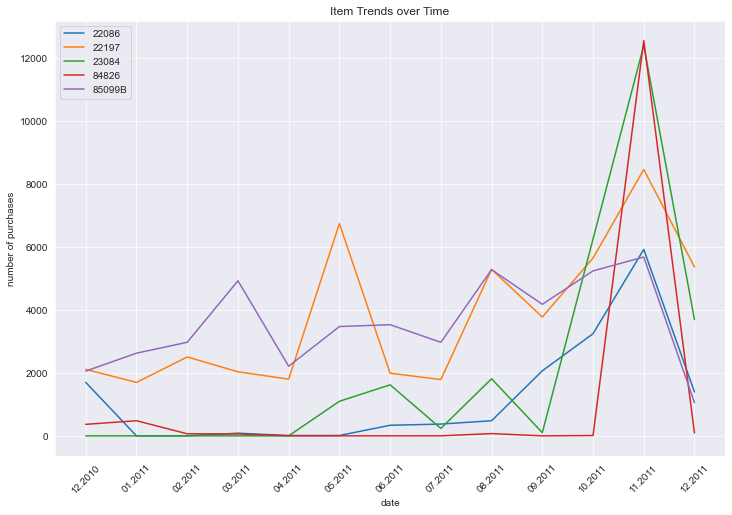

In [66]:
# Plot the above information
ax = pd.DataFrame(trending_itmes_df.values).plot(figsize=(12,8), grid=True,)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_itmes_df.columns, loc='upper left')

plt.xticks(range(len(trending_itmes_df.index)), [x.strftime('%m.%Y') for x in trending_itmes_df.index], rotation=45)